In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('data/zomato.csv',encoding='latin-1')
print(df)

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

<h3>Things to be done in data analysis</h1>
1. Missing Values<br>
2. Explore about numerical variables</br>
3. Explore about categorical Variables</br>
4. Finding Relationship between features</br>


In [ ]:
#checking missing values
df.isnull().sum()

In [ ]:
#code for find missing value column
[features for features in df.columns if df[features].isnull().sum()>0]

<Axes: >

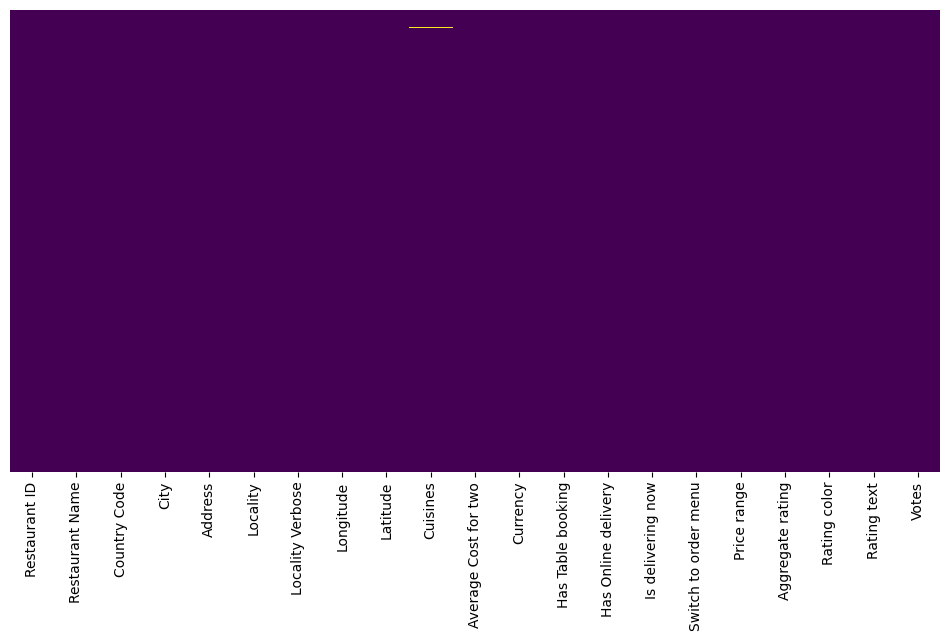

In [43]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df_country_code =pd.read_excel("data/Country-Code.xlsx")
df_country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [18]:
#merge table
final_df = pd.merge(df,df_country_code,on='Country Code',how='left')

In [ ]:
final_df

In [ ]:
final_df.dtypes

How many records of countries are there

In [ ]:
final_df.Country.value_counts()

In [24]:
countries = final_df.Country.value_counts().index

In [ ]:
countriesValues = final_df.Country.value_counts().values
countriesValues

([<matplotlib.patches.Wedge at 0x1cd2b514410>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.39%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.73%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.87%')])

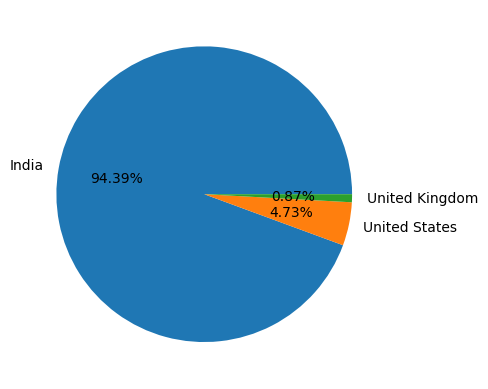

In [31]:
#take only top 3 countries
plt.pie(countriesValues[:3],labels=countries[:3],autopct="%1.2f%%")

In [32]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [39]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})

In [40]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<h4>Ovservations</h4>
4.9 - 4.5 ---> Excellent <br>
4.4 - 4.0 ---> Very Good<br>
3.0 - 3.5 ---> Good<br>
3.4 - 2.5 ---> Average<br>
2.4 - 1.8 ---> Poor<br>
0.0 -----> Not rated<br>

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

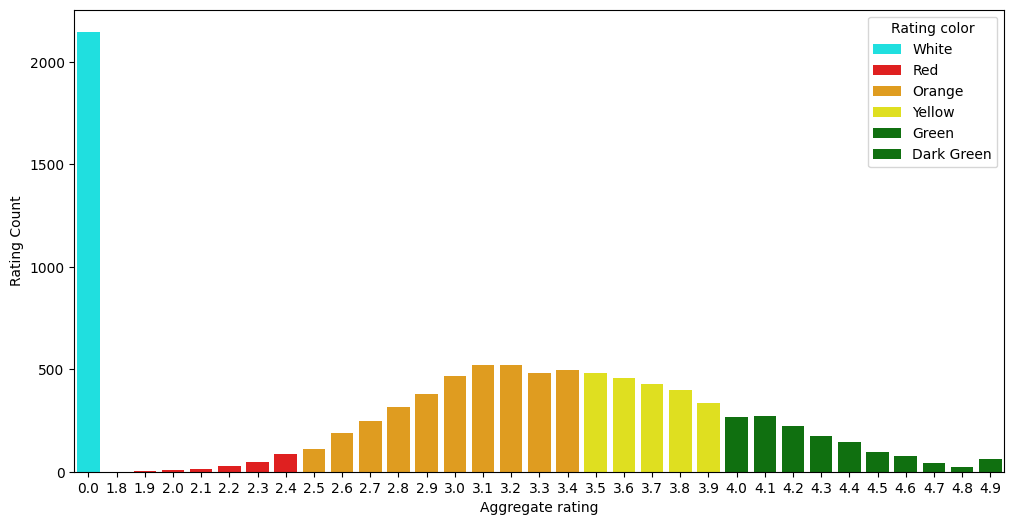

In [49]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings,hue='Rating color',palette=['cyan','red','orange','yellow','green','green'])

<h3>Observations</h3>
1. Not rated count is very high<br>
2. Maximum number of ratings are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

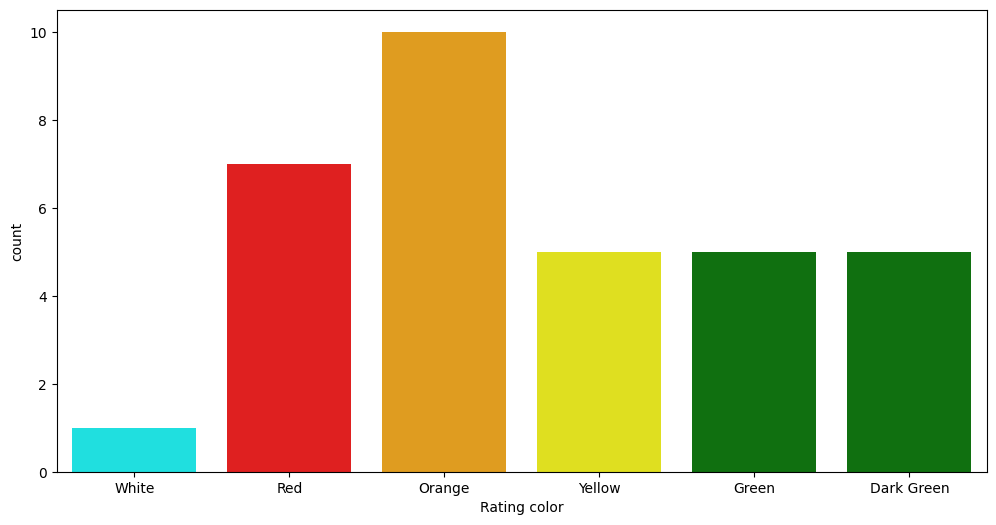

In [53]:
## count plot
sns.countplot(x="Rating color",data=ratings,hue='Rating color',palette=['cyan','red','orange','yellow','green','green'])

<h3>Find the countries name that has given 0 rating</h3>

In [59]:
final_df[final_df['Rating text']=='Not rated']['Country'].value_counts().reset_index()

,Country,count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


<h3>Find out which currency is used by which country</h3>

In [69]:
final_df[['Country','Currency']].groupby(["Country","Currency"]).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


<h3>Which countries do have online deliveries option</h3>

In [80]:
final_df[final_df["Has Online delivery"]=="Yes"]["Country"].value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

<h3>Create pie chart for city distribution</h3>

In [ ]:
city_values = final_df[final_df["Country"]=="India"]["City"].value_counts().values
city_labels = final_df[final_df["Country"]=="India"]["City"].value_counts().index
print(city_values,city_labels)

([<matplotlib.patches.Wedge at 0x1cd3115ee90>,
 [Text(-0.6145353730323401, 0.9123301350344637, 'New Delhi'),
  Text(0.06236774886414425, -1.0982305149200777, 'Gurgaon'),
  Text(0.878904221413572, -0.6614585169014024, 'Noida'),
  Text(1.0922218482114119, -0.1305811406354216, 'Faridabad'),
  Text(1.099946277419523, -0.010871374841004297, 'Ghaziabad')],
 [Text(-0.33520111256309454, 0.4976346191097074, '68.87%'),
  Text(0.03401877210771504, -0.5990348263200423, '14.07%'),
  Text(0.479402302589221, -0.36079555467349217, '13.59%'),
  Text(0.5957573717516791, -0.07122607671022996, '3.16%'),
  Text(0.5999706967742853, -0.00592984082236598, '0.31%')])

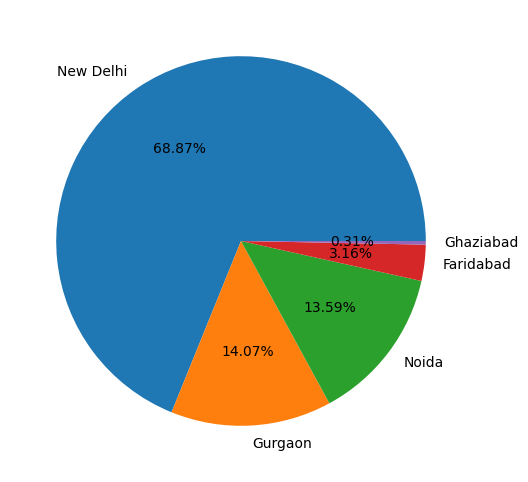

In [87]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct="%1.2f%%")

<h3>Find top 10 cuisines</h3>

In [88]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Cuisines                         Restaurant ID  Restaurant Name        Country Code  City       Address                                                                                      Locality                   Locality Verbose                      Longitude   Latitude    Average Cost for two  Currency                Has Table booking  Has Online delivery  Is delivering now  Switch to order menu  Price range  Aggregate rating  Rating color  Rating text  Votes  Country  
Afghani                          302577         Kabul Delhi            1             New Delhi  I-83, Central Market, Lajpat Nagar 2, New Delhi                                              Lajpat Nagar 2             Lajpat Nagar 2, New Delhi             77.244512    28.570251  550                   Indian Rupees(Rs.)      No                 Yes                  No                 No                    2            2.9               Orange        Average      39     India        1
                                 18